In [1]:
# @copyright 2022, Shardul Rajhans.

# This is a research study for the course 'Master of Science in Data Science' performed by Shardul Rajhans 
# under the supervision of Dr Sandeep Raghuwanshi.

In [2]:
# Importing Necessary Libraries.

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Standardize price values used across datasets
import re

In [3]:
victoria_secret = pd.read_csv('Dataset/victoriassecret_com.csv')
victoria_secret.head()

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,peach melba
1,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,black
2,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,plum dust
3,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,ensign blue
4,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,fair orchid


In [4]:
# Printing shape
victoria_secret.shape

(453386, 14)

In [5]:
# Displaying the information of all the columns
victoria_secret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453386 entries, 0 to 453385
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      453386 non-null  object 
 1   mrp               453386 non-null  object 
 2   price             453386 non-null  object 
 3   pdp_url           453386 non-null  object 
 4   brand_name        453386 non-null  object 
 5   product_category  453386 non-null  object 
 6   retailer          453386 non-null  object 
 7   description       453386 non-null  object 
 8   rating            137734 non-null  float64
 9   review_count      137734 non-null  float64
 10  style_attributes  0 non-null       float64
 11  total_sizes       453386 non-null  object 
 12  available_size    453386 non-null  object 
 13  color             453386 non-null  object 
dtypes: float64(3), object(11)
memory usage: 48.4+ MB


In [6]:
# Displaying the information of all the numeric columns
victoria_secret.describe()

,rating,review_count,style_attributes
count,137734.000000,1.377340e+05,0.0
mean,4.165819,9.202884e+35,NaN
std,0.487524,1.162929e+37,NaN
min,0.000000,2.000000e+00,NaN
25%,4.000000,3.900000e+01,NaN
50%,4.300000,1.470000e+02,NaN
75%,4.500000,4.100000e+02,NaN
max,5.000000,1.560000e+38,NaN


# Cleaning the Dataset
In this section, we will analyze the missing values, remove the unnecessary columns, and perform all the necessary handling before Exploratory Data Analysis.

In [7]:
# There are few columns that are not required throughout this study, hence removing the unnecessary columns.
columns_to_drop = ['pdp_url', 'brand_name', 'retailer', 'rating', 'review_count', 'style_attributes']
victoria_secret.drop(columns_to_drop, axis=1, inplace=True)
victoria_secret.head()

,product_name,mrp,price,product_category,description,total_sizes,available_size,color
0,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,peach melba
1,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,black
2,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,plum dust
3,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,ensign blue
4,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,fair orchid


In [8]:
# Conversion to USD for MRP and Price Coloumn
# Reference: https://www.kaggle.com/code/justinekays/eda-for-lingerie?scriptVersionId=8012060&cellId=14

colon_to_dollar_conversion_rate = 0.0017
ind_rp_to_dollar_conversion_rate = 0.000066

def extract_usd_value(value_str):
    if type(value_str) is str:
        value_str= value_str.strip().lower().replace('usd', '').replace('$','').replace("\-.*","").strip()
        value_str = re.sub(r"-.*", "", value_str)
        value_str = re.sub(r"–.*", "", value_str)
        value_str = re.sub(r"\s.*", "", value_str)
        value_str.strip()
        
        if "₡" in value_str:
            value_str = value_str.replace("₡", "").strip()
            value_str = pd.to_numeric(value_str) * colon_to_dollar_conversion_rate            
        elif "rp" in value_str:
            value_str = value_str.replace("rp", "").strip()
            value_str = pd.to_numeric(value_str) * ind_rp_to_dollar_conversion_rate                
            
        return value_str
    else:
        return value_str
    
victoria_secret['mrp']=victoria_secret['mrp'].apply(extract_usd_value).apply(pd.to_numeric)
victoria_secret['price']=victoria_secret['price'].apply(extract_usd_value).apply(pd.to_numeric)
victoria_secret.head(10)

,product_name,mrp,price,product_category,description,total_sizes,available_size,color
0,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,peach melba
1,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,black
2,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,plum dust
3,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,ensign blue
4,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,fair orchid
5,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,windy blue
6,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,coconut white
7,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",XL,peach melba
8,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",XL,black
9,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",XL,plum dust


In [9]:
# Categorizing the Products into Sub-Groups for generalization.
# Reference: https://www.kaggle.com/code/jkokatjuhha/data-driven-lingerie-shopping?scriptVersionId=6849300&cellId=16
def manipul_regex(str_array):
    string = '|'.join(str_array)
    return '(^|\s)(' + string + ')(\s\.|$)'

def categorize_product(data):
    panties = manipul_regex(['thong','g string','pant','v kini','boypant','pants','panty','thongs','panties',
                             'ladypant','knickers','thong','twist knicker','brief','boyshort',
                             'lace v front short','signature lace bike short','side tie bikini',
                             'signature lace string bikini','tanga','panty','hipster','vikini',
                             'cheekster', 'boypants','ladypants', 'boyshorts', 'hiphugger', 
                             'pink high leg logo bikini', 'pink shortie', 'pink logo bikini',
                             'lace sexy shortie', 'body base shorty', 'bikini bottom', 'lace mini bikini', 
                             'ruched mini bikini', 'high leg bikini'])  
    
    bodys = manipul_regex(['bodysuit', 'teddy', 'wink plaything', 'legging', 'dress'])
    bras = manipul_regex(['bra', 'bustier', 'strapless', 'balconette', 'bandeau', 'body by victoria unlined demi', 
                          'push-up', 'push up', 'push', 'pink seamless lightly lined racerback',
                          'body by wacoal seamless underwire','basic beauty wireless contour',
                          'pink lace lightly lined triangle', 'lace cross front unlined halter', 
                          'high neck keyhole halter', 'high-neck wrap'])
    
    activewear = manipul_regex(['sports bra', 'sport bra', 'sport bralette', 'sports bralette', 'strappybralette', 'full-zip'])
    suspenders = manipul_regex(['suspenders','belt'])
    bralettes = manipul_regex(['bralettes','bralette', 'bralet', 'silicone petal'])
    tops = manipul_regex(['tops','top','tee', 'tunic'])
    babydoll = manipul_regex(['babydoll','camisole and bikini set by bluebella','chemise'])
    shorts = manipul_regex(['short','shorts','chiffon tap pant'])
    slip = manipul_regex(['slip', 'waist slip', 'half-slip', 'slips', 'half-slips', 'petticoat'])
    robe = manipul_regex(['robe', 'kimonos','kimono'])
    camisole = manipul_regex(['camisole','cami','tank'])
    rompers = manipul_regex(['romper']) 
    onepiece = manipul_regex(['One-Piece', 'one piece', 'One-Piece Halter'])
    
    categories_list = [['slip',slip], ['shorts',shorts], ['robe', robe], ['tops',tops], ['suspenders',suspenders],
                 ['rompers', rompers], ['babydoll', babydoll], ['bodys',bodys], ['bralettes', bralettes], 
                 ['activewear', activewear], ['camisoles',camisole], ['bras',bras], ['panties',panties], ['onepiece', onepiece]]

    for items in categories_list:
        naming, reg = items
        data.loc[(data['product_name'].str.contains(reg, case=False)), 'product_category_wide'] = naming
    return data

In [10]:
def manipul_regex(str_array):
    string = '|'.join(str_array)
    return '(^|\s)(' + string + ')(\s|$)'

def categorize_colors(data):
    green = manipul_regex(["green", "emerald", "fir", "bayberry", "cocoon", "olive", "turquoise", "basil", 
                           "seafoam glow", "smokey pearl", "cactus"])
    blue = manipul_regex(["blue", "navy", "teal", "denim", "azure", "celeste", "turkish", "sea", "cloud", 
                          "neon", "ensign", "sky", "sapphire", "saphire", "blues", "ink", "aqua", "watercolor", 
                          "bluebell", "northstar", "bluebird", "inkblot", "nordic", "Evening Tide", "Marine"])
    white = manipul_regex(["white", "ivory", "cashew", "coconut", "marshmallow", "marble", "White/Victoria", 
                           "sugar", "suger", "moon", "Dragonfruit", "pillow", "white/rose", "White/Red"])
    red = manipul_regex(["red", "candy apple", "ginger glaze", "plum", "maroon", "ruby","cherry", "strawberry", 
                         "rose", "apple", "berry", "crimson"])
    yellow = manipul_regex(["yellow", "gold", "buff", "coral rock", 'daisy', "haze", "lime", "leopard", "bronzer", 
                            "ginger", "mango"])
    orange = manipul_regex(["orange", "peach", "sunset", "melon", "floral", "tropical", "teak", "peel", "fireworks", "firework"])
    pink = manipul_regex(["pink", "rosewater", "fuschia", "blush", "peach", "lotus", "fair orchid", "plum dust", "begonia", 
                          "hello lovely", "forever young", "lip", "lipsmacker", "dazzle", "geo", "celestial", 
                          "galaxy", "flamingo", "cream", "pinky", "mauvelous"])
    grey = manipul_regex(["gray", "grey", "pewter", "slate", "silver", "grey/blush", "heather", "Black/White", "marl", 
                          "shadow", "charcoal", "Marl/Victoria", "White/Black"])
    brown = manipul_regex(["brown", "taupe", "chai", "cappuccino", "sienna", "toast", "french roast"])
    maroon = manipul_regex(["maroon", "kir", "cinnamon"])
    purple = manipul_regex(["mauve", "lilac", "purple", "violet", "grape", "blackberry", "amethyst", "lavender", 
                            "lavendar", "red/Blue", "ignited", "eggplant", "fair orichid"])
    black = manipul_regex(["black", "midnight", "night", "Black/Victoria", "dark", "Sapphire/Black", "Black/Mesh", 
                           "Black/Zig Zag", "Black/", "black/rose", "Black/Rock", "Black/Red"])
    nude = manipul_regex(["nude", "bare", "champagne", "light", "neutral", "infinity", "dust", "flake", "Mint", 
                          "nightlife", "Snowflake", "cool", "clean", "Warm"])
    multicolor = manipul_regex(["multi", "blend", "blended", "radiating", "print", "stripe", "stripes", "chevron", 
                                "abstract", "colorblock", "spraypaint", "americana", "mesh", "spring", 
                                "french", "arrows", "arrrows", "moonray", "blocks", "curves", "coral", "rainbow", 
                                "metropolis", "border", "niagara", "aztec", "Striples", "bliss", "kaleidoscope", "party",
                               "paradise palm", "gradient", "2VN", "Seychelles", "multifolk", "C3K", "Multicolor"])
    
    colors_list = [['green',green], ['blue',blue], ['white', white], ['black',black], ['red',red],
                 ['yellow', yellow], ['orange', orange], ['pink',pink], ['nude', nude], 
                 ['grey', grey], ['brown',brown], ['maroon',maroon], ['purple',purple], ['multicolor', multicolor]]
    
    for items in colors_list:
        naming, reg = items
        data.loc[(data['color'].str.contains(reg, case=False)), 'color_group'] = naming
    return data

In [11]:
victoria_secret_c = categorize_colors(victoria_secret)
victoria_secret_c['color_group'].unique()

array(['pink', 'black', 'nude', 'blue', 'white', 'multicolor', 'grey',
       'purple', 'red', 'yellow', 'green', 'brown', 'maroon', 'orange'],
      dtype=object)

In [12]:
victoria_secret_c = categorize_product(victoria_secret_c)
victoria_secret_c['product_category_wide'].unique()

array(['panties', 'bras', 'robe', 'bralettes', 'bodys', 'onepiece',
       'slip', nan, 'tops', 'babydoll', 'shorts', 'camisoles', 'rompers',
       'activewear', 'suspenders'], dtype=object)

In [13]:
victoria_secret_c['product_category_wide'].value_counts()

bras          332304
panties        72448
bralettes      32075
bodys           3228
slip            2952
onepiece        1658
babydoll        1599
tops            1515
camisoles       1417
rompers          450
robe             385
activewear       199
shorts           168
suspenders         2
Name: product_category_wide, dtype: int64

In [14]:
victoria_secret_c['product_category_wide'].isnull().sum()

2986

In [15]:
# There are some products like bottle, basketball, etc. that are not relevant for this study, thus can be dropped.
# Also, the suspenders cateogory can be removed as it has only 2 entries.

victoria_secret_s = victoria_secret_c[~(victoria_secret_c['product_category_wide'].isnull()) & 
                                      ~(victoria_secret_c['product_category_wide'] == 'suspenders')]
victoria_secret_s.head()

,product_name,mrp,price,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,peach melba,pink,panties
1,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,black,black,panties
2,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,plum dust,nude,panties
3,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,ensign blue,blue,panties
4,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,fair orchid,pink,panties


In [16]:
victoria_secret_s['product_category_wide'].value_counts()

bras          332304
panties        72448
bralettes      32075
bodys           3228
slip            2952
onepiece        1658
babydoll        1599
tops            1515
camisoles       1417
rompers          450
robe             385
activewear       199
shorts           168
Name: product_category_wide, dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

In [17]:
victoria_secret_s.head()

,product_name,mrp,price,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,peach melba,pink,panties
1,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,black,black,panties
2,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,plum dust,nude,panties
3,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,ensign blue,blue,panties
4,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,fair orchid,pink,panties


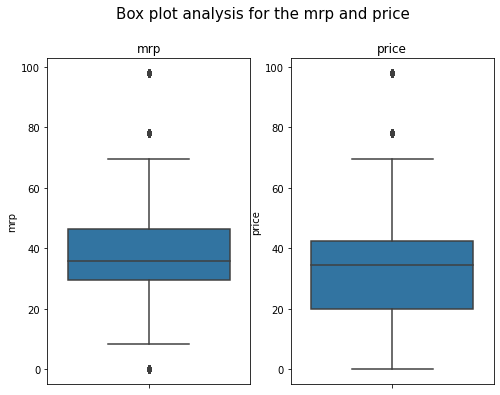

In [18]:
# Box plot for mrp, price

fig, ax = plt.subplots(1,2,figsize=(8, 6))

fig.set_constrained_layout(True)

fig.suptitle('Box plot analysis for the mrp and price', fontsize=15, y=1)

sns.boxplot(x='mrp', data = victoria_secret_s, ax = ax[0], orient='v')

ax[0].set_title('mrp')

sns.boxplot(x='price', data = victoria_secret_s, ax = ax[1], orient='v')

ax[1].set_title('price')

plt.show()

In [19]:
# Checking the statistical informations of the numerical variables

victoria_secret_s[['price', 'mrp']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,price,mrp
count,450398.000000,450398.000000
mean,32.368342,36.075589
std,15.684230,14.779387
min,0.007716,0.007716
5%,10.500000,10.500000
25%,19.990000,29.500000
50%,34.500000,36.000000
75%,42.500000,46.500000
90%,54.500000,56.500000
95%,59.500000,59.500000


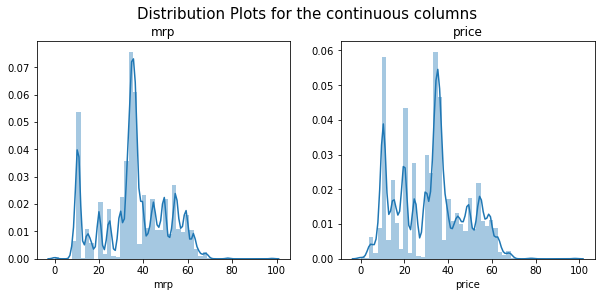

In [20]:
# Let's plot the distribution plot for the continuous columns

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.set_constrained_layout(True)
fig.suptitle('Distribution Plots for the continuous columns', fontsize=15, y=1)

sns.distplot(victoria_secret_s['mrp'], ax=ax[0])
ax[0].set_title('mrp')

sns.distplot(victoria_secret_s['price'], ax=ax[1])
ax[1].set_title('price')

plt.show()

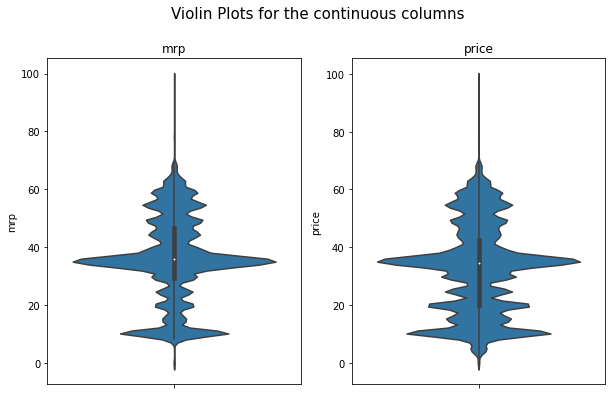

In [21]:
# Let's plot the violin plot for the continuous columns

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

fig.set_constrained_layout(True)
fig.suptitle('Violin Plots for the continuous columns', fontsize=15, y=1)

sns.violinplot(victoria_secret_s['mrp'], ax=ax[0], orient='v')
ax[0].set_title('mrp')

sns.violinplot(victoria_secret_s['price'], ax=ax[1], orient='v')
ax[1].set_title('price')

plt.show()

In [22]:
def univariate_countplot(column, x, y):
    plt.figure(figsize=(x,y))
    ax = sns.countplot(x = column, data = victoria_secret_s, order = victoria_secret_s[column].value_counts().iloc[:10].index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=15)
    # Percentage of bars
    total = float(victoria_secret_s.shape[0])
    
    for p in ax.patches:
            x = p.get_x() + p.get_width() / 2 - 0.45
            y = p.get_y() + p.get_height()
            ax.annotate(p.get_height(), (x, y), size = 12)
    plt.show()

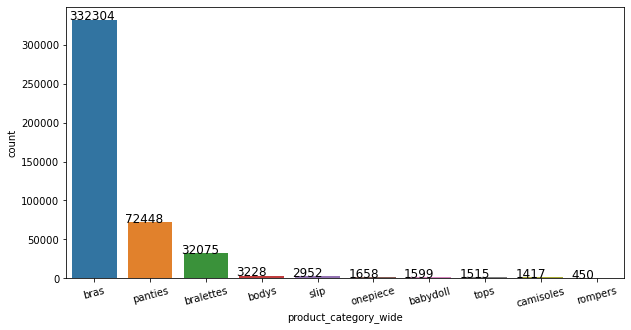

In [23]:
# Let's plot a count plot for product category
univariate_countplot('product_category_wide', 10, 5)

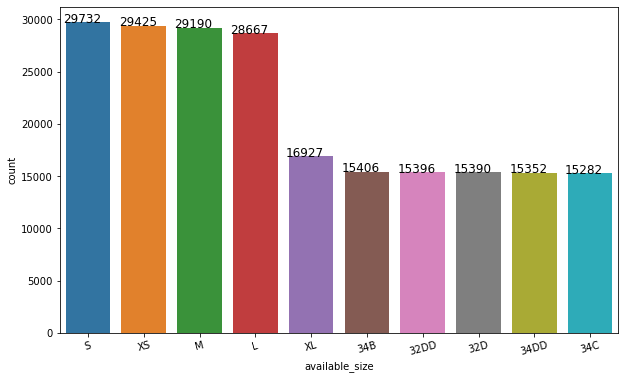

In [24]:
# Let's plot a count plot for available size
univariate_countplot('available_size', 10, 6)

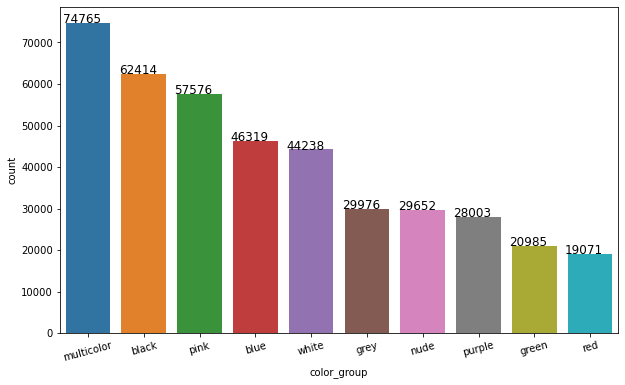

In [25]:
# Let's plot a count plot for color
univariate_countplot('color_group', 10, 6)

In [26]:
victoria_secret_s.head()

,product_name,mrp,price,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,peach melba,pink,panties
1,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,black,black,panties
2,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,plum dust,nude,panties
3,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,ensign blue,blue,panties
4,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,fair orchid,pink,panties


In [27]:
def univariate_piechart(column):
    plt.figure(figsize=(10,8))
    colors = sns.color_palette('bright')[0:20]
    victoria_secret_s[column].value_counts()[:10].plot.pie(autopct='%1.1f%%', shadow=True, subplots=True)
    plt.legend(loc='upper right')
    plt.show()

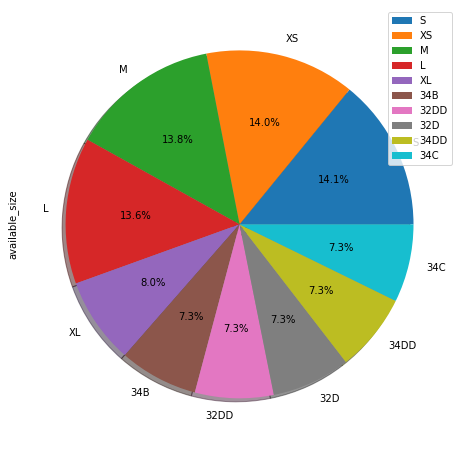

In [28]:
# Pie chart for available sizes
univariate_piechart('available_size')

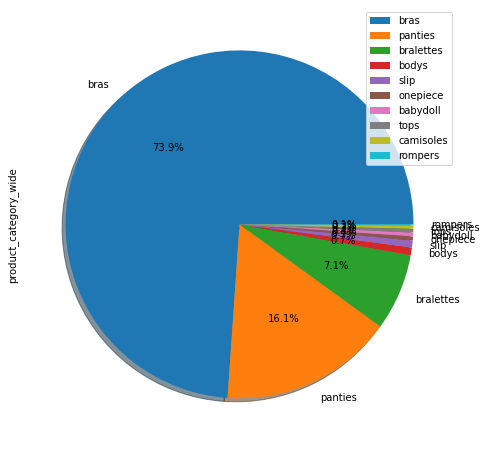

In [29]:
# Pie chart for product categories
univariate_piechart('product_category_wide')

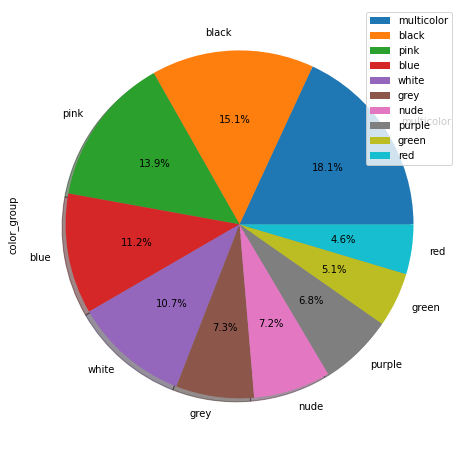

In [30]:
# Pie chart for color
univariate_piechart('color_group')

## Bivariate Analysis

In [31]:
victoria_secret_s.head()

,product_name,mrp,price,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,peach melba,pink,panties
1,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,black,black,panties
2,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,plum dust,nude,panties
3,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,ensign blue,blue,panties
4,Very Sexy Strappy Lace Thong Panty,14.5,14.5,Strappy Lace Thong Panty,"Lots of cheek peek, pretty lace, a strappy bac...","[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,fair orchid,pink,panties


In [32]:
def bivariate_boxplot(column_x, column_y, x, y):
    plt.figure(figsize=(x,y))
    ax = sns.boxplot(x = column_x, y = column_y, data = victoria_secret_s)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=15)
    plt.show()

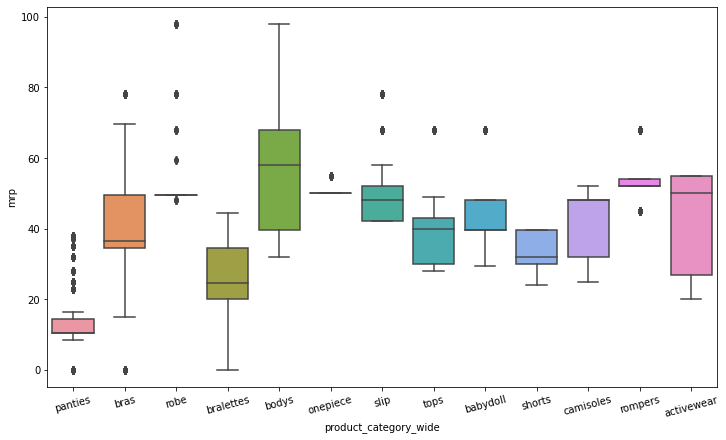

In [33]:
# mrp range for products category
bivariate_boxplot('product_category_wide', 'mrp', 12, 7)

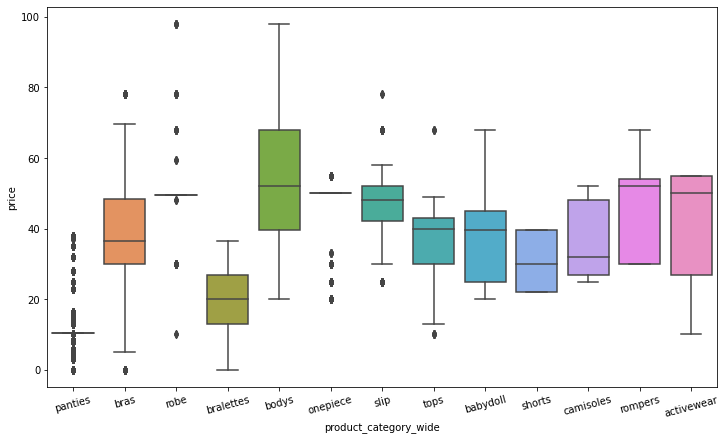

In [34]:
# price range for products category
bivariate_boxplot('product_category_wide', 'price', 12, 7)

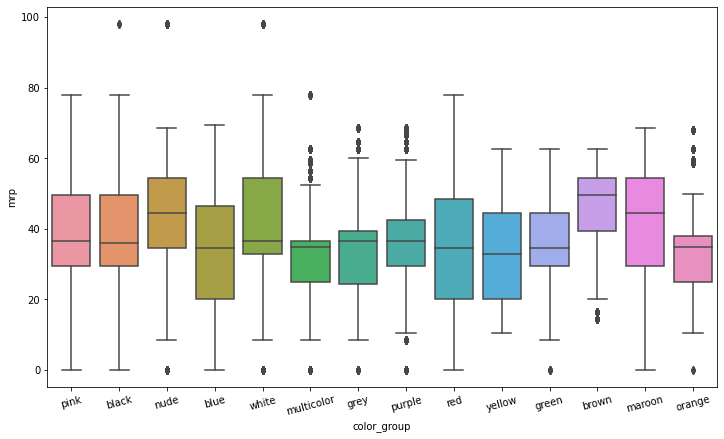

In [35]:
# mrp range for products category
bivariate_boxplot('color_group', 'mrp', 12, 7)

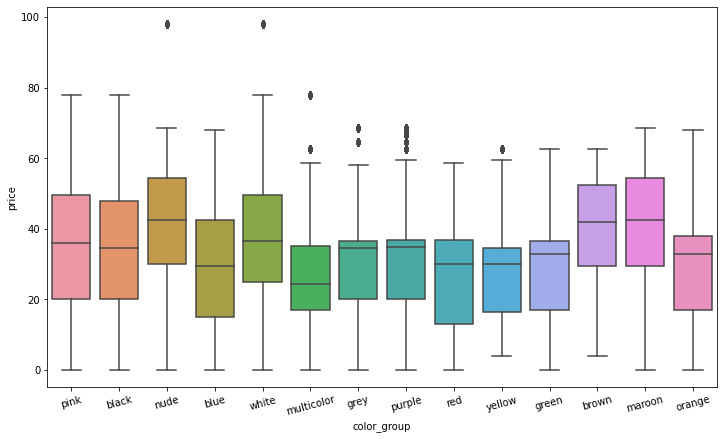

In [36]:
# price range for products category
bivariate_boxplot('color_group', 'price', 12, 7)

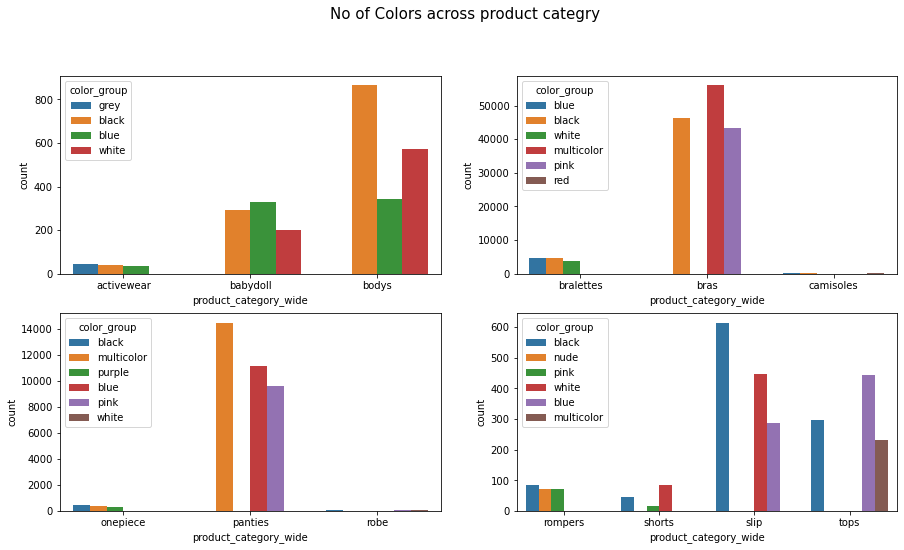

In [37]:
vst = victoria_secret_s.groupby(['product_category_wide', 'color_group'])['product_category_wide'].agg({'count'})
vst = vst['count'].groupby('product_category_wide', group_keys=False).nlargest(3)
vst = pd.DataFrame(vst).reset_index(drop=False)


fig, ax = plt.subplots(2,2,figsize=(15, 8))
fig.suptitle('No of Colors across product categry',fontsize=15,y=1)
sns.barplot(x = 'product_category_wide', hue='color_group', y = 'count', data = vst.iloc[:9], ax = ax[0][0])
sns.barplot(x = 'product_category_wide', hue='color_group', y = 'count', data = vst.iloc[9:18], ax = ax[0][1])
sns.barplot(x = 'product_category_wide', hue='color_group', y = 'count', data = vst.iloc[18:27], ax = ax[1][0])
sns.barplot(x = 'product_category_wide', hue='color_group', y = 'count', data = vst.iloc[27:], ax = ax[1][1])
plt.show()